# Exploring Oura ring data

In [7]:
#%pip install pandas mlplot
 
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter


## First, let's grab data from local json file, using only sleep data

In [8]:
def grab_oura_json(file_path):    
    with open(file_path) as activities_file:
        data = json.load(activities_file)
        return data

file_path = 'data/oura_2022-03-15T09-41-37.json'
data = grab_oura_json(file_path)
# activity, notes, readiness, restful_periods, sleep    
sleep_df = pd.DataFrame.from_dict(data['sleep'])
sleep_df['datetime'] = pd.to_datetime(sleep_df['summary_date']).dt.normalize()
sleep_df = sleep_df.set_index('datetime')



# Activity
activity_df = pd.DataFrame.from_dict(data['activity'])
activity_df['datetime'] = pd.to_datetime(activity_df['summary_date']).dt.normalize()
activity_df = activity_df.set_index('datetime')
#activity_df.info()

# Readiness
readiness_df = pd.DataFrame.from_dict(data['readiness'])
readiness_df['datetime'] = pd.to_datetime(readiness_df['summary_date']).dt.normalize()
readiness_df = readiness_df.set_index('datetime')
#readiness_df.info()

# Join the data
df = sleep_df.join(activity_df, lsuffix='_sleep', rsuffix='_activity')
df = df.join(readiness_df, rsuffix='_readiness')

# Cut to suitable sample size (just for show, the included data is already chopped)
#df = df.loc['2022-03-01':'2022-03-31']

df.info()

#df.info()
#df.head()
#df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2022-03-01 to 2022-03-14
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   awake                        14 non-null     int64  
 1   bedtime_end                  14 non-null     object 
 2   bedtime_end_delta            14 non-null     int64  
 3   bedtime_start                14 non-null     object 
 4   bedtime_start_delta          14 non-null     int64  
 5   breath_average               14 non-null     float64
 6   deep                         14 non-null     int64  
 7   duration                     14 non-null     int64  
 8   efficiency                   14 non-null     int64  
 9   hr_5min                      14 non-null     object 
 10  hr_average                   14 non-null     float64
 11  hr_lowest                    14 non-null     float64
 12  hypnogram_5min               14 non-null     object 
 13  is

# Time to plot some sleep metrics over timeline

In [9]:
def plot_field(field_name, field_label):
    plt.rcParams["figure.figsize"] = (30,8)
    fig, ax = plt.subplots()
    plt.bar(df.index.values, field_name, data=df, axes=ax) 
    #plt.bar('datetime', field_name, data=df, axes=ax) 
    dfmt = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_ylabel(field_label)
    ax.set_xticks(df.index.values)
    plt.xticks(rotation=90) 
    plt.show()

   


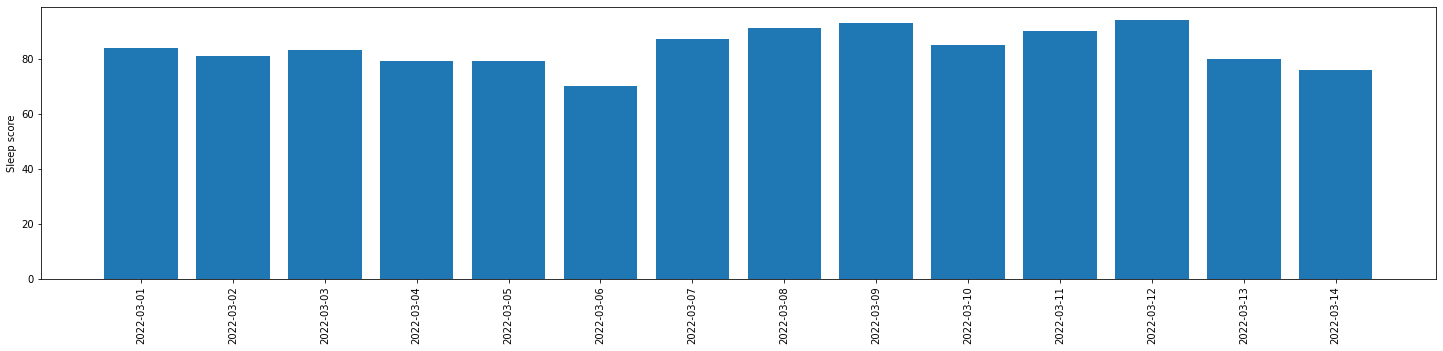

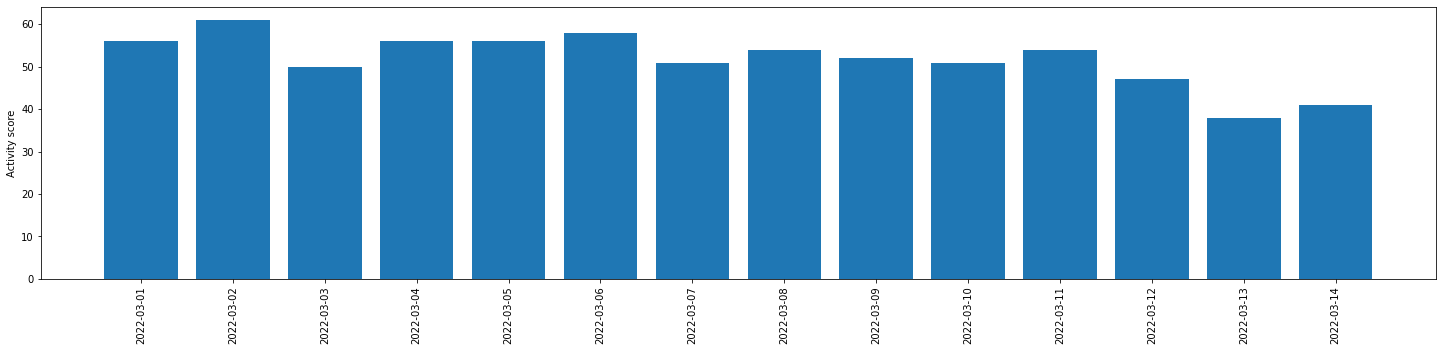

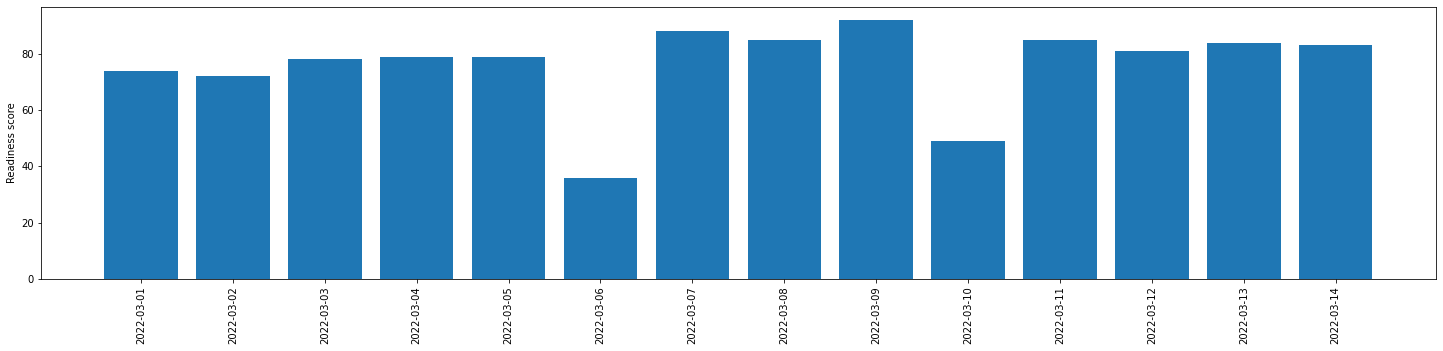

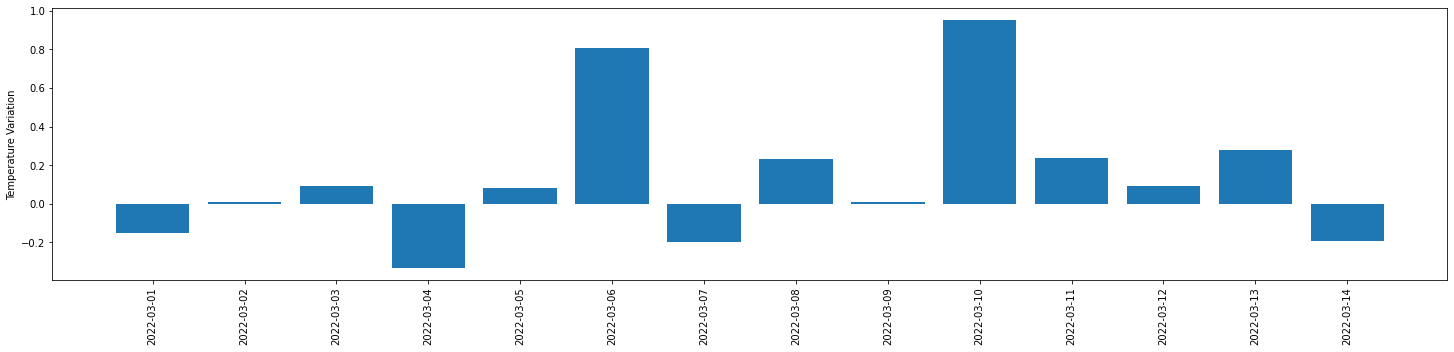

In [5]:
# duration, awake, rem, light, deep
# hr_lowest, hr_average, hr_5min
# efficiency, onset_latency, midpoint_time, restless
# temperature_delta, breath_average
# score, score_total, score_rem, score_deep, score_efficiency, score_latency, score_disturbances, score_alignment
# rmssd, rmssd_5min


plot_field('score_sleep','Sleep score')
plot_field('score_activity','Activity score')
plot_field('score','Readiness score')
plot_field('temperature_delta','Temperature Variation')



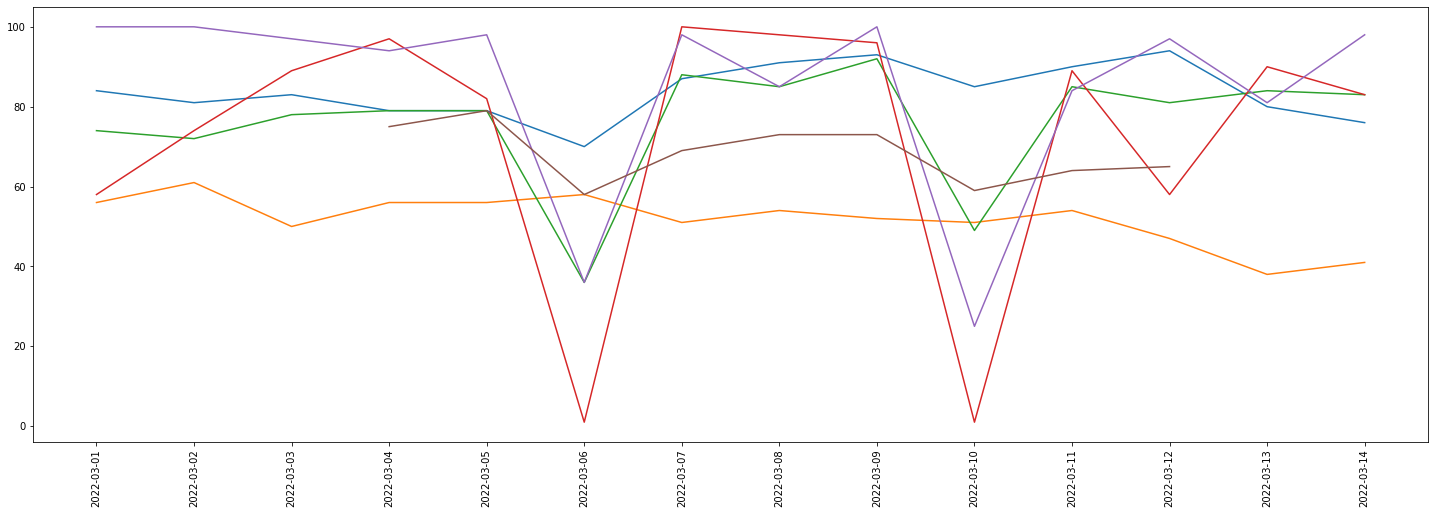

In [6]:
fig, ax = plt.subplots(figsize = (25,8))
dfmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticks(df.index.values)
plt.xticks(rotation=90) 

metrics = ['score_sleep','score_activity','score','score_resting_hr','score_temperature','score_hrv_balance']
for metric in metrics:
    ax.plot(df.index.values, metric, data=df)

plt.show()    